In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [2]:
#import iris dataset
df = pd.read_csv('Downloads/Datasets/Iris.csv')

In [3]:
#review the data
print(df.head(5))
print(df.tail(5))

   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa
      Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
145  146            6.7           3.0            5.2           2.3   
146  147            6.3           2.5            5.0           1.9   
147  148            6.5           3.0            5.2           2.0   
148  149            6.2           3.4            5.4           2.3   
149  150            5.9           3.0            5.1           1.8   

            Species  
145  Iris-virginica  
146  Iris-virginica  
147  Iris-virginica  
148  Iris-virginica  
149  Ir

In [4]:
#lets get some info on our data
#rename cols to add some spacing
cols = ['id', 'sepal_length_cm', 'sepal_width_cm', 'petal_length_cm', 'pedal_width_cm', 'species']
df.columns = cols

#column names
print(df.columns)
print('')

#column data types
print(df.dtypes)
print('')

#look for nulls in each column
for col in df.columns:
    print(col, df[col].isnull().sum())

Index(['id', 'sepal_length_cm', 'sepal_width_cm', 'petal_length_cm',
       'pedal_width_cm', 'species'],
      dtype='object')

id                   int64
sepal_length_cm    float64
sepal_width_cm     float64
petal_length_cm    float64
pedal_width_cm     float64
species             object
dtype: object

id 0
sepal_length_cm 0
sepal_width_cm 0
petal_length_cm 0
pedal_width_cm 0
species 0


In [5]:
#our target is species so check the types of available species
print('Species')
print(df['species'].unique())

#describe date
print('Quick Stats')
print(df.describe())

Species
['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']
Quick Stats
               id  sepal_length_cm  sepal_width_cm  petal_length_cm  \
count  150.000000       150.000000      150.000000       150.000000   
mean    75.500000         5.843333        3.054000         3.758667   
std     43.445368         0.828066        0.433594         1.764420   
min      1.000000         4.300000        2.000000         1.000000   
25%     38.250000         5.100000        2.800000         1.600000   
50%     75.500000         5.800000        3.000000         4.350000   
75%    112.750000         6.400000        3.300000         5.100000   
max    150.000000         7.900000        4.400000         6.900000   

       pedal_width_cm  
count      150.000000  
mean         1.198667  
std          0.763161  
min          0.100000  
25%          0.300000  
50%          1.300000  
75%          1.800000  
max          2.500000  


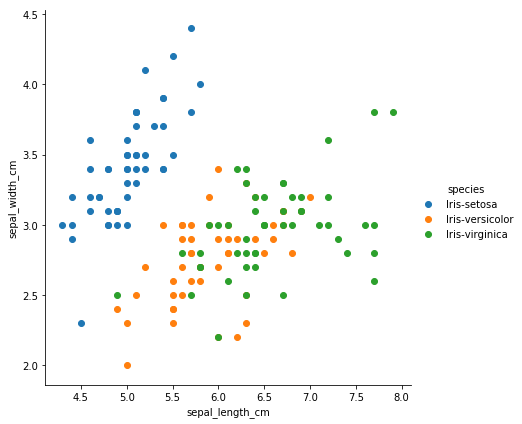

In [6]:
#plot the septal data by species
sns.FacetGrid(df, hue='species', height=6) \
   .map(plt.scatter, 'sepal_length_cm', 'sepal_width_cm') \
   .add_legend()

plt.show()

In [7]:
#lets seperate features for some machine learning
features = list(df.columns[1:5])
target = df.columns[5]

#store feature matrix in X
x = df.iloc[:,1:5]

#store response matrix in Y
y = df.iloc[:,5]

print('features')
print(features)
print('')

print('target')
print(target)
print('')

print('shape')
print(x.shape)
print(y.shape)

features
['sepal_length_cm', 'sepal_width_cm', 'petal_length_cm', 'pedal_width_cm']

target
species

shape
(150, 4)
(150,)


In [8]:
#important preprocessing step in supervised machine learning. Encode response labels in to machine readable form
le = preprocessing.LabelEncoder()
le.fit(y)
y = le.transform(y)

#make new column to store the encoded labels
df['encoded_species'] = y

print('classes:', le.classes_)
print('Response variable after encoding:', y)
df.tail(10)

classes: ['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']
Response variable after encoding: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


,id,sepal_length_cm,sepal_width_cm,petal_length_cm,pedal_width_cm,species,encoded_species
140,141,6.7,3.1,5.6,2.4,Iris-virginica,2
141,142,6.9,3.1,5.1,2.3,Iris-virginica,2
142,143,5.8,2.7,5.1,1.9,Iris-virginica,2
143,144,6.8,3.2,5.9,2.3,Iris-virginica,2
144,145,6.7,3.3,5.7,2.5,Iris-virginica,2
145,146,6.7,3.0,5.2,2.3,Iris-virginica,2
146,147,6.3,2.5,5.0,1.9,Iris-virginica,2
147,148,6.5,3.0,5.2,2.0,Iris-virginica,2
148,149,6.2,3.4,5.4,2.3,Iris-virginica,2
149,150,5.9,3.0,5.1,1.8,Iris-virginica,2


### KNN Model

In [38]:
#time to make the model using the KNN classifier
knn_model = KNeighborsClassifier(n_neighbors=1)
knn_model.fit(x, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=1, p=2,
           weights='uniform')

In [18]:
#lets generate some predictions based off of this basic model
value = knn_model.predict([[3, 5, 4, 2]])
print('value:', value)
print('Predicted Species:', df.loc[df['encoded_species'] == 2, 'species'].values[0])

value: [2]
Predicted Species: Iris-virginica


In [19]:
#lets print a few more rows based upon new x rows
x_new = [[3, 5, 4, 2], [5, 4, 3, 2]]
knn_model.predict(x_new)

array([2, 1])

In [42]:
#now lets try a new value for k 
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(x, y)

print(knn_model.predict(x_new))

kypred = knn_model.predict(x)

[1 1]


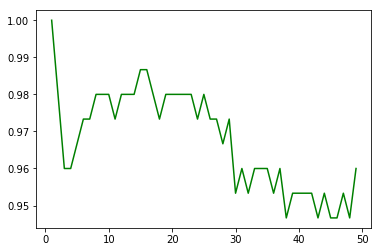

1 0.98
2 0.96
3 0.96
4 0.9666666666666667
5 0.9733333333333334
6 0.9733333333333334
7 0.98
8 0.98
9 0.98
10 0.9733333333333334
11 0.98
12 0.98
13 0.98
14 0.9866666666666667
15 0.9866666666666667
16 0.98
17 0.9733333333333334
18 0.98
19 0.98
20 0.98
21 0.98
22 0.98
23 0.9733333333333334
24 0.98
25 0.9733333333333334
26 0.9733333333333334
27 0.9666666666666667
28 0.9733333333333334
29 0.9533333333333334
30 0.96
31 0.9533333333333334
32 0.96
33 0.96
34 0.96
35 0.9533333333333334
36 0.96
37 0.9466666666666667
38 0.9533333333333334
39 0.9533333333333334
40 0.9533333333333334
41 0.9533333333333334
42 0.9466666666666667
43 0.9533333333333334
44 0.9466666666666667
45 0.9466666666666667
46 0.9533333333333334
47 0.9466666666666667
48 0.96


In [43]:
#so how do we find out what the best value is to use for K?
v = []

k_range = list(range(1, 50))

#loop through all of the range of K values and make a model that inserts each value into the model
for i in k_range:
    knn_model = KNeighborsClassifier(n_neighbors=i)
    #fit the data to the model
    knn_model.fit(x, y)
    k_pred = knn_model.predict(x)
    v.append(metrics.accuracy_score(y, k_pred))
    
#plot the outcomes of the various K values and their accuracy scores
plt.plot(k_range, v, color='green')
plt.show()

for i in k_range:
    try:
        print(i, v[i])
    except:
        pass

### Logistic Regression

In [37]:
#instigate the new LR model
lr_model = LogisticRegression()

#fit data to the model
lr_model.fit(x, y)

#run a test prediction
test_pred = lr_model.predict([[3, 5, 4, 2]])
print(test_pred)

y_pred = lr_model.predict(x)
print(y_pred)

[2]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 2 1 1 1
 1 1 1 1 1 1 1 1 1 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


### Classification Accuracy #1

In [45]:
print('knn model accuracy')
print(metrics.accuracy_score(y, kypred))
print('')

print('logistic regression model accuracy')
print(metrics.accuracy_score(y, y_pred))

knn model accuracy
0.9666666666666667

logistic regression model accuracy
0.96


### Evaluation Procedure #2 Train/Test Split

In [48]:
#split data into train and test data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=4)

print(x_train.shape)
print(y_train.shape)

(90, 4)
(90,)


### Logistic Regression Train/Test Retrain

In [51]:
#create new Logistic Regression Model with training/test data
lr_model2 = LogisticRegression()
lr_model2.fit(x_train, y_train)

#predict from test
lr2_pred = lr_model2.predict(x_test)

#check the accuracy of the new model using the validation set
print(metrics.accuracy_score(lr2_pred, y_test))

0.95


### KNN Train/Test Retrain

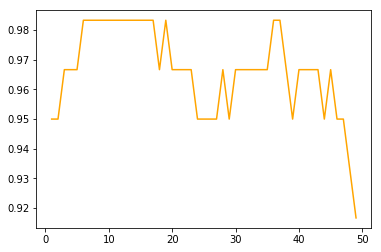

In [57]:
#find the optimal K by looping through models using training data
val = []

k_ranges = list(range(1, 50))

for i in k_ranges:
    knn_model2 = KNeighborsClassifier(n_neighbors=i)
    #train model with the training set
    knn_model2.fit(x_train, y_train)
    knn_model2_pred = knn_model2.predict(x_test)
    val.append(metrics.accuracy_score(y_test, knn_model2_pred))
    
plt.plot(k_ranges, val, color='orange')
plt.show()

In [63]:
#looks like somewhere around 12 is the optimal K so know we are going to make the v2 model using 12 as K
knn2 = KNeighborsClassifier(n_neighbors=12)
knn2.fit(x_train, y_train)

#test model accuracy using validation set
knn2_pred = knn2.predict(x_test)

print(metrics.accuracy_score(y_test, knn2_pred))

0.9833333333333333
